In [1]:
import pandas as pd

In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [4]:
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [5]:
print(customers.duplicated())
print(products.duplicated())
print(transactions.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool
0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


In [6]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [7]:
print(customers.describe())
print(products.describe())
print(transactions.describe())

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [8]:
print(customers.dtypes)
print(products.dtypes)
print(transactions.dtypes)

CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object
TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object


In [9]:
print(customers)
print(products)
print(transactions)

    CustomerID        CustomerName         Region  SignupDate
0        C0001    Lawrence Carroll  South America  2022-07-10
1        C0002      Elizabeth Lutz           Asia  2022-02-13
2        C0003      Michael Rivera  South America  2024-03-07
3        C0004  Kathleen Rodriguez  South America  2022-10-09
4        C0005         Laura Weber           Asia  2022-08-15
..         ...                 ...            ...         ...
195      C0196         Laura Watts         Europe  2022-06-07
196      C0197    Christina Harvey         Europe  2023-03-21
197      C0198         Rebecca Ray         Europe  2022-02-27
198      C0199      Andrea Jenkins         Europe  2022-12-03
199      C0200         Kelly Cross           Asia  2023-06-11

[200 rows x 4 columns]
   ProductID              ProductName     Category   Price
0       P001     ActiveWear Biography        Books  169.30
1       P002    ActiveWear Smartwatch  Electronics  346.30
2       P003  ComfortLiving Biography        Books   44

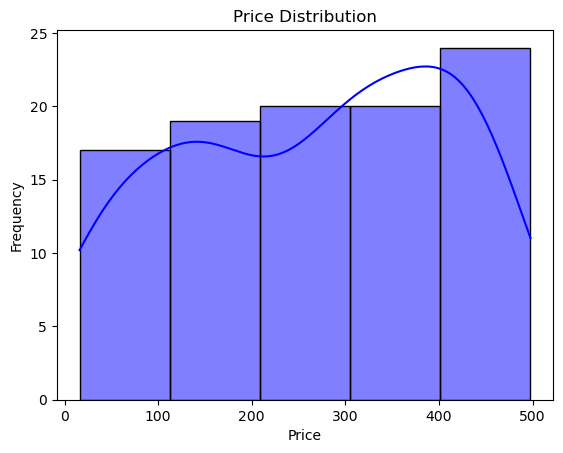

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# Histogram with Seaborn
sns.histplot(products['Price'], bins=5, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

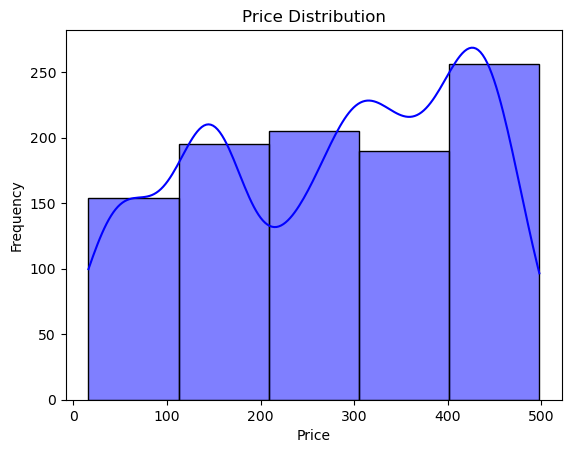

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# Histogram with Seaborn
sns.histplot(transactions['Price'], bins=5, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Merge datasets for comprehensive EDA
# Step 1: Merge transactions with customers
transactions_customers = pd.merge(transactions, customers, on="CustomerID", how="left")

# Step 2: Merge the result with products
merged_data = pd.merge(transactions_customers, products, on="ProductID", how="left")

# Check the structure of the merged dataset
merged_data.head()


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [13]:
merged_data = merged_data.drop(columns=["Price_y"])
merged_data = merged_data.rename(columns={"Price_x" : "Price"})
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics
...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics


In [14]:
# EDA: Analysis on the merged dataset

# 1. Most popular products by quantity sold
popular_products = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(5)

# 2. Revenue generated by product category
category_revenue = merged_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)

# 3. High-value customers by total purchase value
high_value_customers = merged_data.groupby(["CustomerID", "CustomerName"])["TotalValue"].sum().sort_values(ascending=False).head(5)

# 4. Transactions by region
transactions_by_region = merged_data["Region"].value_counts()

# 5. Monthly transaction trend
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
monthly_trend = merged_data.groupby(merged_data["TransactionDate"].dt.to_period("M"))["TotalValue"].sum()

# Display results
{
    "popular_products": popular_products,
    "category_revenue": category_revenue,
    "high_value_customers": high_value_customers,
    "transactions_by_region": transactions_by_region,
    "monthly_trend": monthly_trend.head()  # Displaying the first few months' trends
}

{'popular_products': ProductName
 ActiveWear Smartwatch    100
 SoundWave Headphones      97
 HomeSense Desk Lamp       81
 ActiveWear Rug            79
 SoundWave Cookbook        78
 Name: Quantity, dtype: int64,
 'category_revenue': Category
 Books          192147.47
 Electronics    180783.50
 Clothing       166170.66
 Home Decor     150893.93
 Name: TotalValue, dtype: float64,
 'high_value_customers': CustomerID  CustomerName 
 C0141       Paul Parsons     10673.87
 C0054       Bruce Rhodes      8040.39
 C0065       Gerald Hines      7663.70
 C0156       William Adams     7634.45
 C0082       Aimee Taylor      7572.91
 Name: TotalValue, dtype: float64,
 'transactions_by_region': Region
 South America    304
 North America    244
 Europe           234
 Asia             218
 Name: count, dtype: int64,
 'monthly_trend': TransactionDate
 2023-12     3769.52
 2024-01    66376.39
 2024-02    51459.27
 2024-03    47828.73
 2024-04    57519.06
 Freq: M, Name: TotalValue, dtype: float64}

In [15]:
# Merge transactions with products
transactions_data = transactions.merge(products, on='ProductID', how='left')
print(transactions_data)
# Merge transactions with customers
customer_data = transactions.merge(customers, on='CustomerID', how='left')
print(customer_data)

    TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0          T00001      C0199      P067  2024-08-25 12:38:23         1   
1          T00112      C0146      P067  2024-05-27 22:23:54         1   
2          T00166      C0127      P067  2024-04-25 07:38:55         1   
3          T00272      C0087      P067  2024-03-26 22:55:37         2   
4          T00363      C0070      P067  2024-03-21 15:10:10         3   
..            ...        ...       ...                  ...       ...   
995        T00496      C0118      P037  2024-10-24 08:30:27         1   
996        T00759      C0059      P037  2024-06-04 02:15:24         3   
997        T00922      C0018      P037  2024-04-05 13:05:32         4   
998        T00959      C0115      P037  2024-09-29 10:16:02         2   
999        T00992      C0024      P037  2024-04-21 10:52:24         1   

     TotalValue  Price_x                      ProductName     Category  \
0        300.68   300.68  ComfortLiving Bluetooth

In [17]:
transactions_data = transactions_data.drop(columns=["Price_y"])
transactions_data = transactions_data.rename(columns={"Price_x" : "Amount"})
transactions_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Amount,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics
...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,SoundWave Smartwatch,Electronics
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,SoundWave Smartwatch,Electronics
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,SoundWave Smartwatch,Electronics
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,SoundWave Smartwatch,Electronics


In [61]:
# Step 3: Feature Engineering
# Aggregate transaction data to customer level
customer_features = customer_data.groupby('CustomerID').agg({
    'Price': 'sum',  # Total spending
    'Quantity': 'sum',  # Total quantity purchased
    'ProductID': 'nunique',  # Number of unique products purchased
    #'Category': lambda x: x.mode()[0] if not x.mode().empty else None,  # Most common product category
}).reset_index()

# Encode categorical features (e.g., Category)
#customer_features = pd.get_dummies(customer_features, columns=['Category'], drop_first=True)

# Merge with customer demographics
customer_features = customer_features.merge(customers, on='CustomerID', how='left')

# Step 4: Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = customer_features.select_dtypes(include=['float64', 'int64']).columns
customer_features[numeric_columns] = scaler.fit_transform(customer_features[numeric_columns])

In [62]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load the Customers CSV
customers = pd.read_csv('Customers.csv')

# Check the data types of the columns to ensure we have numeric columns
print("Data types of columns:")
print(customers.dtypes)

# Select only the numeric columns (e.g., exclude customer names, categorical columns)
numeric_columns = customers.select_dtypes(include=['float64', 'int64']).columns

# Debug: Check which numeric columns are selected
print("\nNumeric columns selected:")
print(numeric_columns)

# If no numeric columns are found, print the first few rows of the data to inspect
if len(numeric_columns) == 0:
    print("\nInspecting the first few rows of the data:")
    print(customers.head())

# If there are numeric columns, proceed with feature extraction
if len(numeric_columns) > 0:
    # Extract the features (first 20 customers) based on the numeric columns
    features = customers.loc[0:19, numeric_columns].values
    customer_ids = customers.loc[0:19, 'CustomerID'].values

    # Calculate cosine similarity matrix
    similarity_matrix = cosine_similarity(features)

    # Ensure that the similarity matrix has the expected size (20, 20)
    print("\nShape of the similarity matrix:", similarity_matrix.shape)

   

Data types of columns:
CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object

Numeric columns selected:
Index([], dtype='object')

Inspecting the first few rows of the data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [55]:
customer_ids=['C0001','C0002','C0003','C0004','C0005','C0006','C0007','C0008','C0009','C0010','C0011','C0012','C0013','C0014','C0015','C0016','C0017','C0018','C0019','C0020']
for i in customer_ids:
       target_customer_id = i  # Replace with a valid CustomerID
       recommendations = recommend_similar_customers(target_customer_id, top_n=3)
       print("Recommendations for Customer", target_customer_id)
       print(recommendations)

Recommendations for Customer C0001
CustomerID
C0191    0.978177
C0137    0.971983
C0069    0.956852
Name: C0001, dtype: float64
Recommendations for Customer C0002
CustomerID
C0029    0.999992
C0031    0.994460
C0035    0.994432
Name: C0002, dtype: float64
Recommendations for Customer C0003
CustomerID
C0010    0.950037
C0176    0.939681
C0027    0.928475
Name: C0003, dtype: float64
Recommendations for Customer C0004
CustomerID
C0105    0.998505
C0057    0.997795
C0109    0.996340
Name: C0004, dtype: float64
Recommendations for Customer C0005
CustomerID
C0058    0.999842
C0123    0.999604
C0128    0.998677
Name: C0005, dtype: float64
Recommendations for Customer C0006
CustomerID
C0040    0.998480
C0026    0.978652
C0092    0.978424
Name: C0006, dtype: float64
Recommendations for Customer C0007
CustomerID
C0135    0.995579
C0085    0.995553
C0074    0.995518
Name: C0007, dtype: float64
Recommendations for Customer C0008
CustomerID
C0108    0.998303
C0090    0.998277
C0179    0.996913
Name